In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('/kaggle/input/mnist-digits/mnist_digits_train.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [7]:
df.shape

(60000, 785)

In [8]:
df['784'].unique()

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8])

In [9]:
df['784'].value_counts()

784
1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64

In [11]:
X = df.drop(columns=['784'])
y = df['784']

In [12]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


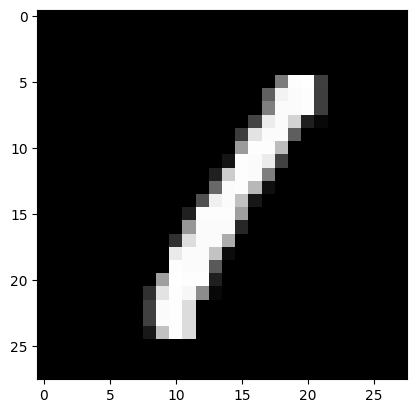

In [21]:
plt.imshow(X.values[3].reshape(28,28), cmap='gray')
plt.show()

**Step 1-** Define data

In [31]:
X = df.drop(columns=['784'])
y = df['784']

In [53]:
from keras.utils import to_categorical
Yt = to_categorical(y)
Yt.shape

(60000, 10)

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Xs = scaler.fit_transform(X)

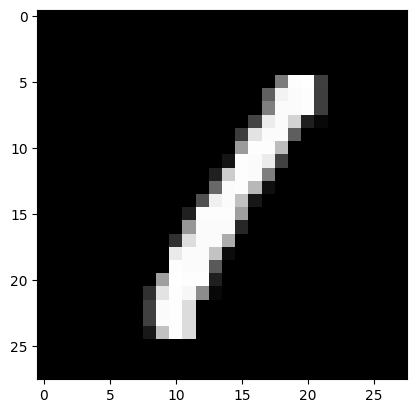

In [55]:
plt.imshow(Xs[3].reshape(28,28), cmap='gray')
plt.show()

In [57]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xs,Yt)

In [58]:
xtrain.shape

(45000, 784)

**Step 2-** Build your model

In [65]:
from keras import models, layers

model = models.Sequential()

model.add(layers.Dense(20 ,activation='relu', input_shape=(784,)))

model.add(layers.Dense(10, activation='sigmoid'))

In [66]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,910 (62.15 KB)

 Trainable params: 15,910 (62.15 KB)

 Non-trainable params: 0 (0.00 B)

**Step 3-** Compile the model

In [67]:
model.compile(optimizer = 'sgd' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

**Step 4-** Train the model

In [68]:
model.fit(xtrain,ytrain,
         epochs=20,
         validation_data=(xtest,ytest))

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6281 - loss: 1.2738 - val_accuracy: 0.8773 - val_loss: 0.4532
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8887 - loss: 0.4119 - val_accuracy: 0.9001 - val_loss: 0.3562
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9029 - loss: 0.3415 - val_accuracy: 0.9133 - val_loss: 0.3182
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9110 - loss: 0.3128 - val_accuracy: 0.9181 - val_loss: 0.2983
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9186 - loss: 0.2922 - val_accuracy: 0.9222 - val_loss: 0.2830
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9224 - loss: 0.2714 - val_accuracy: 0.9258 - val_loss: 0.2711
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9277 - loss: 0.2541 - val_accuracy: 0.9273 - val_loss: 0.2616
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9276 - loss: 0.2532 - 

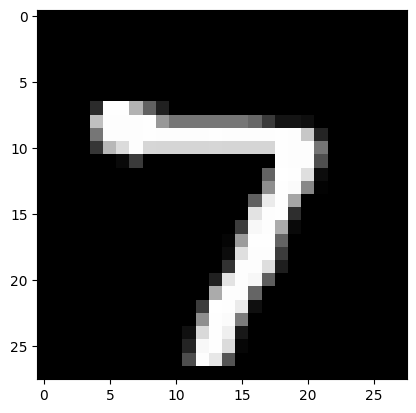

In [77]:
plt.imshow(xtest[8].reshape(28,28),cmap='gray')
plt.show()

In [74]:
xtrain.shape

(45000, 784)

In [78]:
model.predict(xtest[8].reshape(1,784))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[8.5195348e-02, 2.7267823e-05, 4.5494744e-01, 9.2700303e-01,
        1.9774823e-02, 1.7721343e-01, 2.7402586e-04, 9.9998283e-01,
        7.7962524e-01, 8.7436658e-01]], dtype=float32)

In [80]:
print(np.argmax(model.predict(xtest[8].reshape(1,784))))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
7
